 # **<u>TEAM B01 - Boston 311 Service Request and Resolution Analysis</u>**
### **<u>*Team Members*</u>:** Rohit Devanaboina, Yifan (Eva) Fan, Riris Grace, Jiayi Huang, Shailoz Kumar Singh
![picture](https://www.thedataschool.com.au/wp-content/uploads/2022/01/Featured-picture-1080x265.png)

---



## **<u>Objective</u>**
### To identify the reasons behind why some requests are resolved in a timely manner, while others go unresolved or overdue. We hope to understand and quantify the factors behind successful request resolution, and incorporate them into a predictive model that can accurately predict the likelihood of a given request's timely resolution.

## **<u>Motivation</u>**:  

### By analyzing 311's successes and failures, we can help the city better understand why the system fails to resolve a significant portion of requests received. This understanding will help the city make better informed decisions regarding resource allocation, public services, and general administrative strategy. The expected end result is an overall increase in the 311 system's **resolution rate** and a higher quality of life for Bostonians.


## **<u>Key Performance Indicators</u>**
### We measure the success of this analysis by the following metrics:

### Exploratory Insights -

*   The number of factors identified as having a significant influence on requset resolution rate
*   The feasibility of our recommendations

### Model Insights –
  
*   The metrics of our predictive model - Precision, Recall, Calibration, ROC-AUC
*   The quantity and quality of relationships and connections uncovered by our model












# **Report Summary**

### In following analysis, we have cleaned and tidyed the messy data provided by Boston's CRM system, enriched it with additional data on the city from external sources, produced numerous visulizations highlighting the problems faced during the 311 request resolution, and built a predictive model that can accurately predict the probability of a given request's on-time resolution.


# **Table of Contents**
---


## 0. [Overview of Data](#scrollTo=C6B_Ool9Begr&line=1&uniqifier=1)
## 1.   [Data Cleaning](#scrollTo=1e9w_CnEPHvb)
## 2.   [Data Tidying & Enrichment](#scrollTo=5xH2gXiEwjYg&line=1&uniqifier=1)
## 3. [Exploratory Data Analysis](#scrollTo=D3IL2T94Bj6u&line=1&uniqifier=1)
## 4. [Summary](#scrollTo=VFITY3VcVQL2&line=1&uniqifier=1)
## 5. [Modeling](#scrollTo=UB4LRRO4VWdw&line=1&uniqifier=1/)
## 6. [Conclusions](#scrollTo=VFITY3VcVQL2&line=1&uniqifier=1)
## 7. [References](#scrollTo=PtOgsinel0qN)


# **Step 0: Overview of Data**
---


## **<u>What is Boston 311?</u>**

* #### BOS:311 is a hotline developed by the City of Boston to enable citizens to directly reach out to constituent representatives regarding non-emergency requests, services, and information.

* #### If you have a problem that doesn't warrant a 911 call, 311 is the place to go. It functions as a city-wide CRM system, with the government as the enterprise and the residents as customers.

## **<u>What does the data describe?</u>**

#### The dataset is a compilation of all 311 requests made in Boston in the year 2023 to date. The list is updated daily, so the data is imported directly from the data.boston.gov website.

* ### **Data Source** - City of Boston - City Constituent Relationship Management (CRM) system -> [Link to Data](https://data.boston.gov/dataset/311-service-requests/resource/e6013a93-1321-4f2a-bf91-8d8a02f1e62f)

## **<u>Components of Dataset</u>**

#### **Datapoints** - 245,214 entries as of October 4, 2023 | **Variables** - 30 variables of varying data types. Key variables include:


*   DateTime
  * `open_dt` = moment of request creation
  * `closed_dt` = moment of request closure
  * `sla_target_df` = city's target closure date
* String
  * `closure_reason`= a 311-operator generated reason for a request's closure
  * `location_street_name` = a non-standardized address in raw text
* Category
  * `on_time` = whether a given request was completed by `sla_target_dt` or not
  * `subject` = a broad set of ~20 categories which every request is listed under
  * `neighborhood` = name of neighborhood in which request was generated





# **Step 1: Data Cleaning**
---

### **Importing 311 Requests Data**

In [ ]:
# Importing lastest 311 service requests from data.boston site
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = "https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/e6013a93-1321-4f2a-bf91-8d8a02f1e62f/download/tmp1m2x5llz.csv"
service_requests = pd.read_csv(url)
original_rows = len(service_requests)
service_requests.head()

<ipython-input-24-0cf83738c93b>:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  service_requests = pd.read_csv(url)


,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source
0,101004615823,2023-01-01 00:07:00,2023-01-04 03:30:00,2023-01-01 01:55:43,ONTIME,Closed,Case Closed. Closed date : Sun Jan 01 06:55:43...,Requests for Street Cleaning,Public Works Department,Street Cleaning,...,Dorchester,9,17,1708,INTERSECTION Darlington St & Wentworth St,NaN,42.288616,-71.075567,0101000020E610000047E20415D6C451C0556CC45EF124...,Constituent Call
1,101004615825,2023-01-01 00:28:00,2023-01-10 03:30:00,2023-01-03 03:32:42,ONTIME,Closed,Case Closed Case Noted,Ground Maintenance: --Not in list-- - BPRD,Parks & Recreation Department,Park Maintenance & Safety,...,Greater Mattapan,13,12,1207,INTERSECTION Morton St & Canterbury St,NaN,42.293218,-71.096377,0101000020E6100000257F23092BC651C0102DF2288825...,Constituent Call
2,101004615826,2023-01-01 00:33:08,2023-01-04 03:30:00,2023-01-03 03:04:08,ONTIME,Closed,Case Closed. Closed date : Tue Jan 03 08:04:08...,Request for Pothole Repair,Public Works Department,Highway Maintenance,...,West Roxbury,10,18,1819,INTERSECTION Alwin St & Dedham Pkwy,NaN,42.254699,-71.143554,0101000020E6100000669A80FC2FC951C0504AC1F79920...,Citizens Connect App
3,101004615827,2023-01-01 00:37:21,2024-01-01 00:37:24,2023-01-03 01:45:48,ONTIME,Closed,Case Closed. Closed date : Tue Jan 03 06:45:48...,Tree Maintenance Requests,Parks & Recreation Department,Trees,...,West Roxbury,10,18,1819,INTERSECTION Alwin St & Dedham Pkwy,NaN,42.254699,-71.143554,0101000020E6100000669A80FC2FC951C0504AC1F79920...,Citizens Connect App
4,101004615828,2023-01-01 00:37:35,2023-01-04 03:30:00,2023-01-03 01:42:23,ONTIME,Closed,Case Closed. Closed date : 2023-01-03 06:42:23...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,South Boston / South Boston Waterfront,5,6,0606,INTERSECTION Beckler Ave & K St,NaN,42.333498,-71.037366,0101000020E61000000C0F103464C251C03329BF13B02A...,Citizens Connect App


### **Handling Incorrect Data Types**

In [ ]:
# Converting Columns to Categories dtype
categories_subset = ["on_time", "case_status", "subject", "reason", "type", "queue", "department", "neighborhood", "location_zipcode", "source"]
service_requests[categories_subset] = service_requests[categories_subset].astype("category")

In [ ]:
# Converting relevant columns to datetime type
service_requests['sla_target_dt'] = pd.to_datetime(service_requests['sla_target_dt'])
service_requests['open_dt'] = pd.to_datetime(service_requests['open_dt'])
service_requests['closed_dt'] = pd.to_datetime(service_requests['closed_dt'])

In [ ]:
## convert type from Float64 to Int64
service_requests['location_zipcode'] = service_requests['location_zipcode'].astype('Int64')

### **Handling Missing Values**

In [ ]:
# Check if ID is unique and has no missing valiues
caseid_unique = service_requests['case_enquiry_id'].is_unique; print(f"Case IDs are unique: {caseid_unique}")
id_isnull = service_requests['case_enquiry_id'].isnull(); print(f"Case IDs missing: {service_requests[id_isnull].shape[0]}")

Case IDs are unique: True
Case IDs missing: 0


In [ ]:
# Checking for missing values
service_requests.isnull().mean() * 100

case_enquiry_id                    0.000000
open_dt                            0.000000
sla_target_dt                     21.148657
closed_dt                          9.992895
on_time                            0.000000
case_status                        0.000000
closure_reason                     0.000000
case_title                         0.000000
subject                            0.000000
reason                             0.000000
type                               0.000000
queue                              0.000000
department                         0.000000
submitted_photo                   99.911475
closed_photo                      73.741327
location                           0.000000
fire_district                      0.168509
pwd_district                       0.021743
city_council_district              0.002718
police_district                    0.019802
neighborhood                       0.064064
neighborhood_services_district     0.003883
ward                            

In [ ]:
#Dropping cases without close_dt (i.e ongoing cases)
service_requests['open_dt'].replace(' ', np.nan, inplace=True)
service_requests['closed_dt'].replace(' ', np.nan, inplace=True)
service_requests =service_requests.dropna(subset=["open_dt","closed_dt"]);

## fill null zip code value with 00000
service_requests['location_zipcode'] = service_requests['location_zipcode'].fillna(0);
service_requests['location_zipcode'] = service_requests['location_zipcode'].astype(str).apply(lambda x: x.zfill(5))

#missingkey = rows that are missing values both location or target date - they are deemed too incomplete for analysis
missingkey = (service_requests['sla_target_dt'].isnull())\
&(service_requests['latitude'].isnull())&(service_requests['location_street_name'].isnull())\
& (service_requests['case_status']=='Closed')

# Dropping missingkey rows & creating cleaned dataframe
requests_clean = service_requests.drop(service_requests[missingkey].index)
print(f"The dataset has {original_rows - len(requests_clean) } requests with essential data missing. They have been dropped")
print(f"The cleaned dataset has {len(requests_clean)} requests")

<ipython-input-30-97cf5bf6e8d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  service_requests['location_zipcode'] = service_requests['location_zipcode'].fillna(0);


The dataset has 25949 requests with essential data missing. They have been dropped
The cleaned dataset has 231604 requests


#### **Note on Missing Values**
*   The essential variables describing each request have 0 missing values
*   Our exploration of the dataset is based on essential + subset of non-essential variables. We do not consider all variables simultaneously for our analysis.

Dropping rows with missing values in non-essential variables would lead to an unnecessary loss of datapoints. Imputation is also not feasible. Thus, we have decided to handle missing values on a **case-by-case basis**.



# **Step 2: Data Tidying & Enrichment**
---

In [ ]:
requests_tidy = requests_clean

In [ ]:
#Subtract close_dt and open_dt to get time difference for each case reported (unit: hours)
requests_tidy['hours_to_closure'] = (requests_tidy['closed_dt'] - requests_tidy['open_dt']).dt.total_seconds()/ 3600

In [ ]:
# Creating closure_reason category

# Function to categorize closure reasons
def categorize_closure_reason(closure_reason):

# Defining the mapping of closure reasons to categories
    category_mapping = {
        "Resolved": ["Resolved", "clear", "Clear", "solved"],
        "Duplicate": ["Duplicate", "existing"],
        "Noted": ["Noted", "noted", "violation"],
        "Invalid": ["Case Invalid", "invalid", "not enough"]
    }

# Iterate through the mapping to find the matching category
    for category, reasons in category_mapping.items():
        if any(reason in closure_reason for reason in reasons):
            return category

# If no category matches, return a default category
    return "Others"

# Create a new column 'closure_category' by applying the categorization function
requests_tidy['closure_category'] = requests_tidy['closure_reason'].apply(categorize_closure_reason)


In [ ]:
# List of columns in requests_tidy
columns = requests_tidy.columns.tolist()

# Finding the index of 'closure_reason' and 'closure_category' and moving 'closure_category' immediately after 'closure_reason'
closure_reason_index = columns.index('closure_reason')
closure_category_index = columns.index('closure_category')
columns.pop(closure_category_index)
columns.insert(closure_reason_index + 1, 'closure_category')

# Reorder the DataFrame columns
requests_tidy = requests_tidy[columns]

#Change 'closure_category' dtype to category
requests_tidy["closure_category"] = requests_tidy["closure_category"].astype("category")

In [ ]:
# Adding useful neighborhood-level statistics from external data sources

## Regions | Source - https://www.cityofboston.gov/maps/pdfs/ward_and_precincts.pdf
boston_central = ["Back Bay", "Beacon Hill", "Boston", "Downtown / Financial District",
                  "Fenway / Kenmore / Audubon Circle / Longwood", "South Boston",
                  "South Boston / South Boston Waterfront", "South End" ]
boston_peripheral_south = ["Chestnut Hill", "Greater Mattapan", "Dorchester", "Hyde Park", "Jamaica Plain",
                           "Mattapan", "Mission Hill","Roslindale", "Roxbury", "West Roxbury"]
boston_peripheral_west = ["Allston", "Allston / Brighton", "Brighton",]
boston_others = ["Charlestown", "East Boston", ' ']

boston_regions = boston_central + boston_peripheral_south + boston_peripheral_west + boston_others

### Mapping Values
r_conditions = [requests_tidy["neighborhood"].isin(boston_central), requests_tidy["neighborhood"].isin(boston_peripheral_south),
                requests_tidy["neighborhood"].isin(boston_peripheral_west), requests_tidy["neighborhood"].isin(boston_others)]
r_values = ["Central", "South", "West", "Other"]
requests_tidy["region"] = np.select(r_conditions,r_values)

requests_tidy["region"]

## Poverty Rate | Source - https://www.bostonplans.org/getattachment/732b0b04-c218-439d-aa4d-40a3111d2956
boston_low_poverty = ["South Boston / South Boston Waterfront", "West Roxbury"] # bottom 10%
boston_high_poverty = ["Fenway / Kenmore / Audubon Circle / Longwood", "Mission Hill"] #top 10%
boston_moderate_poverty = list(set(boston_regions) - set(boston_low_poverty) - set(boston_high_poverty)) #mid 80%

### Mapping Values

p_conditions = [requests_tidy["neighborhood"].isin(boston_high_poverty), requests_tidy["neighborhood"].isin(boston_moderate_poverty),
                requests_tidy["neighborhood"].isin(boston_low_poverty)]
p_values = ["Above Average", "Average", "Below Average"]
requests_tidy["poverty_rate"] = np.select(p_conditions,p_values)

##Population | Source: https://www.bostonplans.org/getattachment/7987d9b4-193b-4749-8594-e41f1ae27719

population = {"Allston": 24904, "Back Bay": 18190, "Beacon Hill": 9336, "Brighton": 52047,
                    "Charlestown": 19120, "Dorchester": 122191, "Downtown / Financial District": 13768,
                    "East Boston":43066,"Fenway / Kenmore / Audubon Circle / Longwood": 37493,"Hyde Park":34172,
                    "Jamaica Plain":40015, "Mattappan":23840,"Mission Hill":17518,"Roslindale":29586,"Roxbury":54533,
                    "South Boston":37917, "South Boston / South Boston Waterfront":5579,"South End":30904,
                    "West Roxbury":31561}
population["Boston"] = int(sum(population.values())/len(population.values()))
population["Allston / Brighton"] = int(population["Allston"] + population["Brighton"])/2
population["Chestnut Hill"] = 8805 #https://www.niche.com/places-to-live/n/chestnut-hill-newton-ma/
population["Greater Mattappan"] =population["Mattappan"]
population[" "] = population["Boston"]

### Mapping Values
requests_tidy['population'] = requests_tidy['neighborhood'].map(population)

## Age | Source = https://www.bostonplans.org/getattachment/7987d9b4-193b-4749-8594-e41f1ae27719

age = {"Boston": "midage/employed", "Allston": "youth/student", "Back Bay": "midage/employed", "Beacon Hill": "midage/employed", "Brighton": "youth/student",
                    "Charlestown": "midage/employed", "Dorchester": "midage/employed", "Downtown / Financial District": "midage/employed",
                    "East Boston":"midage/employed","Fenway / Kenmore / Audubon Circle / Longwood": "youth/student","Hyde Park":"senior/retired",
                    "Jamaica Plain":"midage/employed", "Mattappan":"senior/retired","Mission Hill":"youth/student","Roslindale":"senior/retired","Roxbury":"midage/employed",
                    "South Boston":"midage/employed", "South Boston / South Boston Waterfront":"midage/employed","South End":"senior/retired",
                    "West Roxbury":"senior/retired"}

age["Allston / Brighton"] = "youth/student"
age["Chestnut Hill"] = "senior/retired"
age["Greater Mattappan"] = age["Mattappan"]
age[" "] = age["Boston"]

boston_youth = [x for x,y in age.items() if y == "youth/student"]
boston_midage = [x for x,y in age.items() if y == "midage/employed"]
boston_senior = [x for x,y in age.items() if y == "senior/retired"]

### Mapping Values
a_conditions = [requests_tidy["neighborhood"].isin(boston_youth), requests_tidy["neighborhood"].isin(boston_midage),
                 requests_tidy["neighborhood"].isin(boston_senior)]
a_values = ["Youth (<25)", "Middle Age (25-50)", "Senior (>50)"]
requests_tidy["Age"] = np.select(a_conditions,a_values)


## Diversity |  Source = https://www.bostonplans.org/getattachment/7987d9b4-193b-4749-8594-e41f1ae27719

# Region: % of foreign born populations
diversity = {"Boston": 27, "Allston": 29, "Back Bay": 20, "Beacon Hill": 10, "Brighton": 24,
                    "Charlestown": 17, "Dorchester": 34, "Downtown / Financial District": 34,
                    "East Boston":50,"Fenway / Kenmore / Audubon Circle / Longwood": 25,"Hyde Park":28,
                    "Jamaica Plain":23, "Mattappan":35,"Mission Hill":33,"Roslindale":25,"Roxbury":26,
                    "South Boston":12, "South Boston / South Boston Waterfront":20,"South End":25,
                    "West Roxbury":21}
diversity["Allston / Brighton"] = int(diversity["Allston"] + diversity["Brighton"])/2
diversity["Chestnut Hill"] = 21 #https://datausa.io/profile/geo/newton-ma#foreign_born_population
diversity["Greater Mattappan"] = diversity["Mattappan"]
diversity[" "] = diversity["Boston"]

boston_high_diversity = [x for x,y in diversity.items() if y/diversity["Boston"] >1.2] # Boston avg + >20%
boston_moderate_diversity = [x for x,y in diversity.items() if y/diversity["Boston"] <=1.2 and y/diversity["Boston"] >= 0.8] # Boston Avg +- 20%
boston_low_diversity = [x for x,y in diversity.items() if y/diversity["Boston"] <0.8] # Boston avg - >20%

### Mapping Values
d_conditions = [requests_tidy["neighborhood"].isin(boston_high_diversity), requests_tidy["neighborhood"].isin(boston_moderate_diversity),
                 requests_tidy["neighborhood"].isin(boston_low_diversity)]
d_values = ["Above Average", "Average", "Below Average"]
requests_tidy["Diversity"] = np.select(d_conditions,d_values)


# **Step 3: Exploratory Data Analysis**
---

## Here, we explore the dataset by breaking it down into manageable subsets and asking fundamental questions about the 311 system, its users and its operators

In [ ]:
# Setting Seaborn theme
import seaborn as sns
sns.set_theme(context='notebook', style = "ticks")

## **Question 1: Which methods of 311 request creation are used most frequently and are most likely to be addressed?**
---



### By comparing the **quantity & resolution rate** of service requests across the various request `sources` (App, Phone etc.), we can find out which sources are most effective, and we can provide recommendations to 311 on which sources to devote greater attention and resources to.



In [ ]:
# Count the values of each source
source_counts = requests_tidy['source'].value_counts()
# Calculate the resolved rate for each sourcev
source_open = requests_tidy.groupby('source')['closure_category'].apply(lambda x: (x == 'Resolved').sum() / len(x)).sort_values(ascending=False)

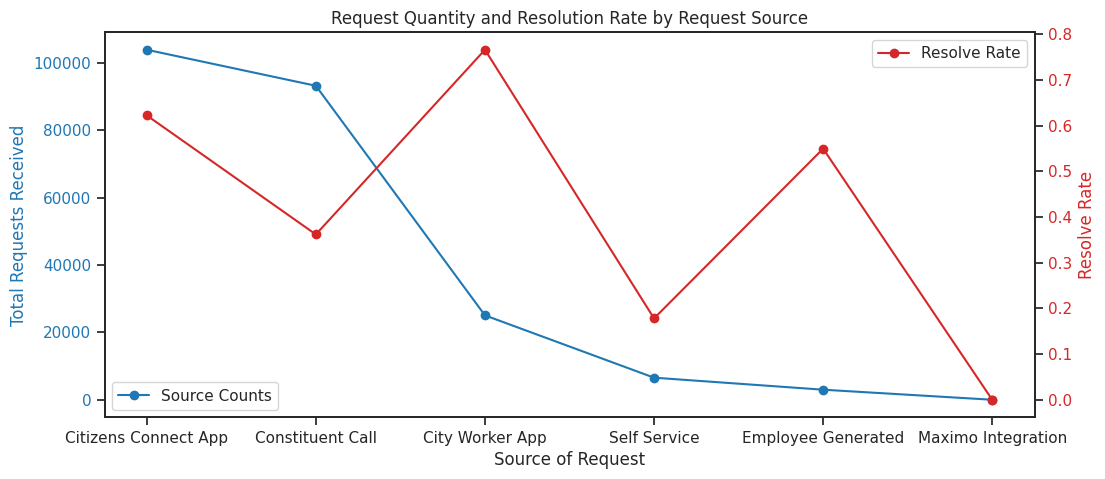

In [ ]:
import matplotlib.pyplot as plt
source_order = ['Citizens Connect App', 'Constituent Call', 'City Worker App', 'Self Service', 'Employee Generated', 'Maximo Integration']

# Arrange the source counts and open rates in the specified order
source_counts_ordered = [source_counts[source] for source in source_order]
open_rates_ordered = [source_open[source] for source in source_order]

# Create a figure and axis
fig, ax1 = plt.subplots(figsize = (12,5))

# Plot source counts as a line graph
color1 = 'tab:blue'
ax1.set_xlabel('Source of Request')
ax1.set_ylabel('Total Requests Received', color=color1)
ax1.plot(source_order, source_counts_ordered, color=color1, marker='o', label='Source Counts')
ax1.tick_params(axis='y', labelcolor=color1)

# Create a second y-axis to plot open rates
ax2 = ax1.twinx()
ax2.set_ylabel('Resolve Rate', color='tab:red')
ax2.plot(source_order, open_rates_ordered, color='tab:red', marker='o', label='Resolve Rate')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Title and legend
plt.title('Request Quantity and Resolution Rate by Request Source')
ax1.legend(loc = 3)
ax2.legend(loc = 0)
plt.show()

### **Insights**:

### By observing this chart, you can see that users most often use apps or make phone calls to request services. However, **App-based requests are twice as likely to be resolved** than ones made by phone.  

### App-based requests often contain **more information on location and nature of problem** than requests placed through the cell hotline. Therefore, we recommend that the city **promote adoption of the 311 app** as it is a more effective way for citizens to report problems and receive support.





## **Question 2: Among all 311 service requests 2023 tickets, which `subject` receives the highest number of complaints from the Boston community, and what are the top subcategories?**
---

### By identifying the **most common issues** faced by the residents of Boston, we can offer insights to the government on how it can enhance its services, thus reducing public complaints.


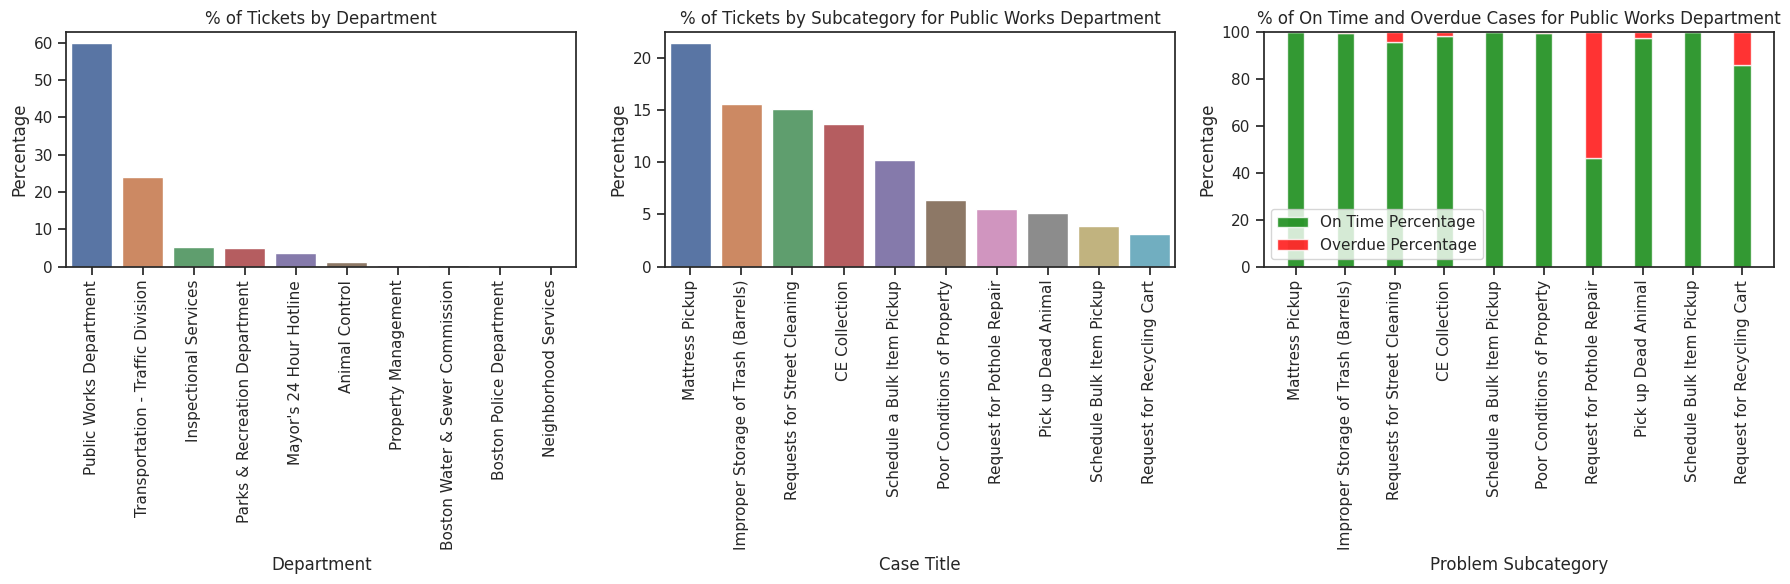

In [ ]:
#1 Identify the count of unique values in the subject variable/column.
import seaborn as sns
import matplotlib.pyplot as plt

unique_rows_subject = len(requests_tidy["subject"].drop_duplicates())

#2 Calculate the percentage of ticket case count for each subject category in descending order and the number of cases status that is Closed and still Open

# Create the new DataFrame for subject category
new_df = pd.DataFrame(requests_tidy)

# Calculate the percentage of ticket case count for each subject category in descending order
subject_group = new_df["subject"].value_counts().sort_values(ascending=False)
total_cases = len(new_df)
subject_percentage = (subject_group/total_cases) * 100

# Create the subject DataFrame with subject and percentage column
subject_df = subject_percentage.reset_index()
subject_df.columns = ["subject", "percentage"]

# Calculate the percentage of case status "Closed" and "Open" tickets for each subject category
closed_tickets_percentage = (new_df[new_df["case_status"] == "Closed"].groupby("subject").size() / subject_group) * 100
open_tickets_percentage = (new_df[new_df["case_status"] == "Open"].groupby("subject").size() / subject_group) * 100

# Add the "Closed" and "Open" ticket percentages
subject_df["closed_tickets_percentage"] = subject_df["subject"].map(closed_tickets_percentage)
subject_df["open_tickets_percentage"] = subject_df["subject"].map(open_tickets_percentage)
subject_df = subject_df.fillna(0)

#3 From the data, we can identify that the Public Works Department (PWDx) reported the highest number of cases.
# Afterward, we can identify the majority (top 10) of problems faced by Boston residents based on the case title.
#Then, Calculate the percentage of (top 10) of problems for Public Works Department category and the number of cases status that is Closed and still Open

# Create the new DataFrame for the top ten cases
case_pwd = requests_tidy[requests_tidy["subject"]=="Public Works Department"]
case_pwd_count = case_pwd["case_title"].value_counts().sort_values(ascending=False).head(10)
new_df = pd.DataFrame(case_pwd_count)

# Calculate the percentage of ticket case count for each subject category in descending order
total_cases = new_df.agg("sum")
case_percentage = (new_df/total_cases) * 100

# Create a DataFrame consist of case title and percentage of each case
case_df = case_percentage.reset_index()
case_df.columns = ["case_title", "percentage"]

# Calculate the percentage of case status "Closed" and "Open" tickets for each subject category
ontime_percentage = (case_pwd[case_pwd["on_time"] == "ONTIME"].groupby("case_title").size() / case_pwd_count) * 100
overdue_percentage = (case_pwd[case_pwd["on_time"] == "OVERDUE"].groupby("case_title").size() / case_pwd_count) * 100

# Add the "Closed" and "Open" ticket percentages
case_df["ontime_percentage"] = case_df["case_title"].map(ontime_percentage)
case_df["overdue_percentage"] = case_df["case_title"].map(overdue_percentage)
case_df = case_df.fillna(0)

#5 Make the graph

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graph 1: Bar Plot for subject_df
subject_df = subject_df.sort_values(by="percentage", ascending=False)
sns.set_style("whitegrid")
graph_subject = sns.barplot(data=subject_df, x="subject", y="percentage", order=subject_df["subject"], ax=axes[0])
graph_subject.set_xticklabels(graph_subject.get_xticklabels(), rotation=90)
graph_subject.set_xlabel("Department")
graph_subject.set_ylabel("Percentage")
graph_subject.set_title("% of Tickets by Department")

# Graph 2: Bar Plot for case_df
case_df = case_df.sort_values(by="percentage", ascending=False)
sns.set_style("whitegrid")
graph_case = sns.barplot(data=case_df, x="case_title", y="percentage", order=case_df["case_title"], ax=axes[1])
graph_case.set_xticklabels(graph_case.get_xticklabels(), rotation=90)
graph_case.set_xlabel("Case Title")
graph_case.set_ylabel("Percentage")
graph_case.set_title("% of Tickets by Subcategory for Public Works Department")

# Graph 3: Stacked Bar Plot for "On Time" and "Overdue" percentages
x = np.arange(len(case_df["case_title"]))
width = 0.35
sns.set_style("whitegrid")
bar_ontime = axes[2].bar(x, case_df["ontime_percentage"], width, label="On Time Percentage", color="green", alpha=0.8)
bar_overdue = axes[2].bar(x, case_df["overdue_percentage"], width, bottom=case_df["ontime_percentage"], label="Overdue Percentage", color="red", alpha=0.8)
axes[2].set_xlabel("Problem Subcategory")
axes[2].set_ylabel("Percentage")
axes[2].set_title("% of On Time and Overdue Cases for Public Works Department")
axes[2].set_xticks(x)
axes[2].set_xticklabels(case_df["case_title"], rotation=90)
axes[2].legend()

# Display the subplots
plt.tight_layout()
plt.show()


### **Insights**

* ### From the graph, it can be seen that the Public Works Department (PWDx) subject has the highest number of complaints submitted by Boston residents, which is 58.38% of all complaints.

* ### Within the PWDx subject category, the top complaint is `Mattress Pickup` at 21%. Of the Mattress Pickup cases handled, 99% are completed on time according to the Service Level Agreement (`sla_target_dt`), while other services, such as 'Request for `Pothole Repair` remain overdue.

* ### To optimize government resources, we would advise the city to devote mattress pickups to a standalone division, reducing PWDx's burden allowing them to focus their efforts on more complex, overdue problems (such as pothole repair).


## **Question 3: What is the workload and efficiency of the various departments responding to 311 requests?**
---

### By measuring how requests are distributed between departments, and calculating the efficiency (average `hours_to_closure`) of each department, we can generate recomendations on how the city can **better allocate its 311 workload and manpower across departments**.

<ipython-input-40-274e0c7c26b4>:9: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  new_tidy['department'].cat.add_categories('Others', inplace=True)


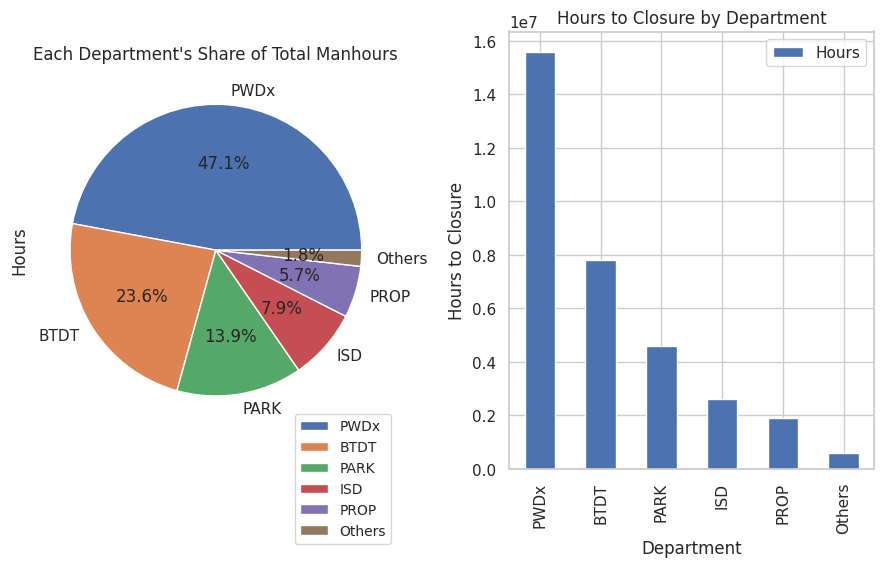

In [ ]:
# Use stacked bar chart to respresent the time (unit:hours) to closure by department
new_tidy = requests_tidy.groupby(["department"])[['hours_to_closure']].agg(sum)
new_tidy.reset_index(inplace=True)
new_tidy_above_700000 = new_tidy[new_tidy['hours_to_closure'] > 700000]
new_df = pd.DataFrame(new_tidy_above_700000.values,columns=["department","hours_to_closure"])
order = requests_tidy.groupby(["department"])['hours_to_closure'].sum().reset_index().sort_values(by="hours_to_closure", ascending=False)["department"]

# Consolidation of departments that doesn't have significant total time to closure and name them tigether as 'Others'
new_tidy['department'].cat.add_categories('Others', inplace=True)
new_tidy.loc[new_tidy['hours_to_closure'] < 1000000, 'department'] = 'Others'

# Sum up the time for each department
new_tidy_grouped = new_tidy.groupby('department')[['hours_to_closure']].agg('sum').reset_index()

# Remove data where hours_to_closure has a percentage of 0
new_tidy_grouped = new_tidy_grouped[new_tidy_grouped['hours_to_closure'] != 0]

# Creat subplots to put the pie chart and the stacked bar chart together
new_tidy_series = new_tidy_grouped['hours_to_closure'].squeeze()
department_name = ['BTDT','ISD','PARK','PROP','PWDx','Others']
numbers=[new_tidy_series[4],new_tidy_series[12],new_tidy_series[15],new_tidy_series[16],new_tidy_series[17],new_tidy_series[18]]

x = pd.Series(numbers, index = department_name, name='Hours')
y = pd.Series.sort_values(x, ascending=False)
z = pd.DataFrame(y)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,6))
z.plot(y=0, kind = 'pie', ax = axes[0], autopct='%1.1f%%')
z.plot(kind = 'bar', ax = axes[1])
axes[0].set_aspect("equal")
axes[0].legend(loc=1, bbox_to_anchor= (1,0.07), fontsize=10)

# Set titles for each subplot and set the label names for the stacked bar chart
axes[0].title.set_text("Each Department\'s Share of Total Manhours")
axes[1].title.set_text("Hours to Closure by Department")
axes[1].set_xlabel('Department')
axes[1].set_ylabel('Hours to Closure')

# Show final consolidated plot
plt.tight_layout()
plt.show()

### The Public Works (PWDx) department takes on average twice as much time to close a request compared to the remaining top 5 departments. Public Works (PWDx) makes up almost half of the total time spent on 311 service requests.

### **Insights**:

* ### The Public Works (PWDx) department has both the largest workload and lowest efficiency (highest `hours_to_closure`).

* ### **We recommend the city augment PWDx's capacity** by -

  * ### allocating more workers to the department
  * ### setting up more PWDx stations across the city, allowing workers to respond more quickly to requests
  



## **Question 4: How does 311 usage change across socioeconomic categories?**
---

### This analysis will give us a better understanding of how Bostonians from different **social, economic and cultural backgrounds** use the 311 service. It will also help identify **underserved groups** that may not have awareness of or access to the 311 service

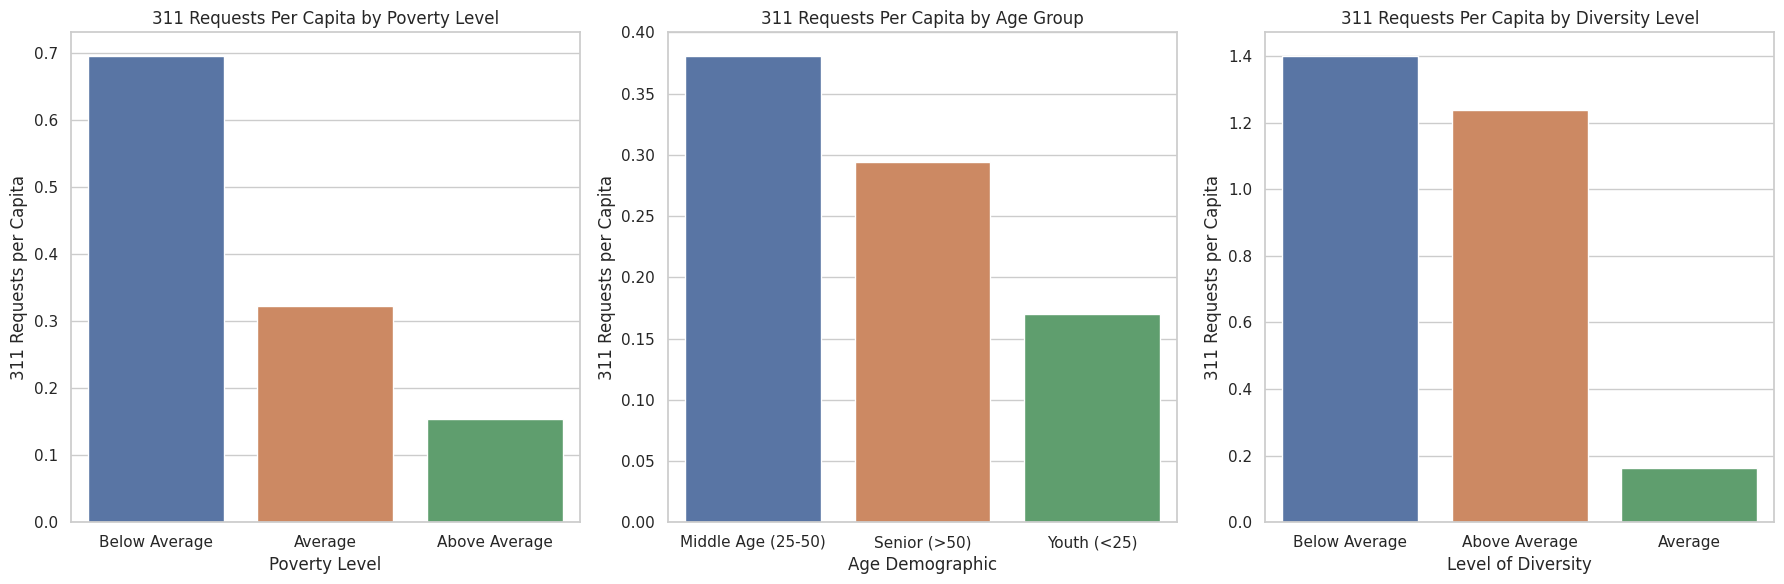

In [ ]:
# We will explore 311 requests per capita across 3 categories - poverty level, age & diversity
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graph 1: Poverty level of neighborhood

## CALCULATING

# Counting 311 requests for each poverty level
poverty_per_capita = requests_tidy.groupby("poverty_rate").count()["case_enquiry_id"].reset_index()
poverty_per_capita["poverty_rate"].replace("0", "Unknown", inplace=True)

# Creating dict - poverty_rate: aggregate population of all neighborhoods falling under this rate
blp = np.nansum(requests_tidy[requests_tidy["poverty_rate"]=="Below Average"]["population"].unique())
abp = np.nansum(requests_tidy[requests_tidy["poverty_rate"]=="Above Average"]["population"].unique())
avp = np.nansum(requests_tidy[requests_tidy["poverty_rate"]=="Average"]["population"].unique())
pov_population = {"Average": avp, "Below Average" :blp, "Above Average": abp}

#Mapping population to poverty_rate & calculating requests per capita
poverty_per_capita['population'] = poverty_per_capita['poverty_rate'].map(pov_population)
poverty_per_capita["per_capita"] = poverty_per_capita["case_enquiry_id"]/poverty_per_capita['population']
order = poverty_per_capita.sort_values(by="per_capita", ascending=False)["poverty_rate"]

## PLOTTING
plot1 = sns.barplot(data=poverty_per_capita, x="poverty_rate", y="per_capita", order=order[:3], ax=axes[0])
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=0)
plot1.set_xlabel("Poverty Level")
plot1.set_ylabel("311 Requests per Capita")
plot1.set_title("311 Requests Per Capita by Poverty Level")


# Graph 2: Age demographic of neighborhood

## CALCULATING

# Counting 311 requests for each age demographic
age_per_capita = requests_tidy.groupby("Age").count()["case_enquiry_id"].reset_index()
age_per_capita["Age"].replace("0", "Unknown", inplace=True)

# Creating dict - Age: aggregate population of all neighborhoods falling under this age demographic
youth = np.nansum(requests_tidy[requests_tidy["Age"]=="Youth (<25)"]["population"].unique())
mid = np.nansum(requests_tidy[requests_tidy["Age"]=="Middle Age (25-50)"]["population"].unique())
old = np.nansum(requests_tidy[requests_tidy["Age"]=="Senior (>50)"]["population"].unique())
age_population = {"Youth (<25)": youth, "Middle Age (25-50)" :mid, "Senior (>50)": old}

#Mapping population to Age demographic & calculating requests per capita
age_per_capita['population'] = age_per_capita['Age'].map(age_population)
age_per_capita["per_capita"] = age_per_capita["case_enquiry_id"]/age_per_capita['population']
order = age_per_capita.sort_values(by="per_capita", ascending=False)["Age"]

## PLOTTING
plot2 = sns.barplot(data=age_per_capita, x="Age", y="per_capita", order=order[:3], ax=axes[1])
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=0)
plot2.set_xlabel("Age Demographic")
plot2.set_ylabel("311 Requests per Capita")
plot2.set_title("311 Requests Per Capita by Age Group")

# Graph 3: Diversity level of neighborhood

## CALCULATING

# Counting 311 requests for each diversity level
div_per_capita = requests_tidy.groupby("Diversity").count()["case_enquiry_id"].reset_index()
div_per_capita["Diversity"].replace("0", "Unknown", inplace=True)

# Creating dict - Diversity: aggregate population of all neighborhoods falling under this diversity level
bld = np.nansum(requests_tidy[requests_tidy["Diversity"]=="Below Average"]["population"].unique())
abd = np.nansum(requests_tidy[requests_tidy["Diversity"]=="Above Average"]["population"].unique())
avd = np.nansum(requests_tidy[requests_tidy["Diversity"]=="Average"]["population"].unique())
div_population = {"Average": avp, "Below Average" :blp, "Above Average": abp}

#Mapping population to diversity level & calculating requests per capita
div_per_capita['population'] = div_per_capita['Diversity'].map(div_population)
div_per_capita["per_capita"] = div_per_capita["case_enquiry_id"]/div_per_capita['population']
order = div_per_capita.sort_values(by="per_capita", ascending=False)["Diversity"]

## PLOTTING
plot3 = sns.barplot(data=div_per_capita, x="Diversity", y="per_capita", order=order[:3], ax=axes[2])
plot3.set_xlabel("Level of Diversity")
plot3.set_ylabel("311 Requests per Capita")
plot3.set_title("311 Requests Per Capita by Diversity Level")
plot3.set_xticklabels(plot3.get_xticklabels(), rotation=0)

# Display the subplots
plt.tight_layout()
plt.show()

### **Insights**



*   ### **Poverty** - Residents of poorer neighborhoods are more active users of 311 than those from more well-off neighborhoods. We would recommend the city allocate more resources and take proactive measures to meet the demands of these regions.
*   ### **Age** - Youth participation in 311 services is half that of other age groups. By running awareness campaigns targeting the under-25 demographic, the city can remedy this shortfall and make 311 more useful for its younger citizens.

* ### **Diversity** - Areas on either end of the diversity spectrum have a 6x higher request rate than areas in the middle. However, it is to be noted that neighborhoods in Boston with an average level of diversity have a higher than average median household income. As we noted earlier, income is inversly proportionate to request rates, and we believe this is the factor at play here. Further exploration is required.

## **Question 5: How does the quantity of requests change over time?**
---

### After experimenting with this part of data we can identify the major time contraints and give the city a better idea of the nature of incoming traffic, helping them preempt demand and plan ahead.

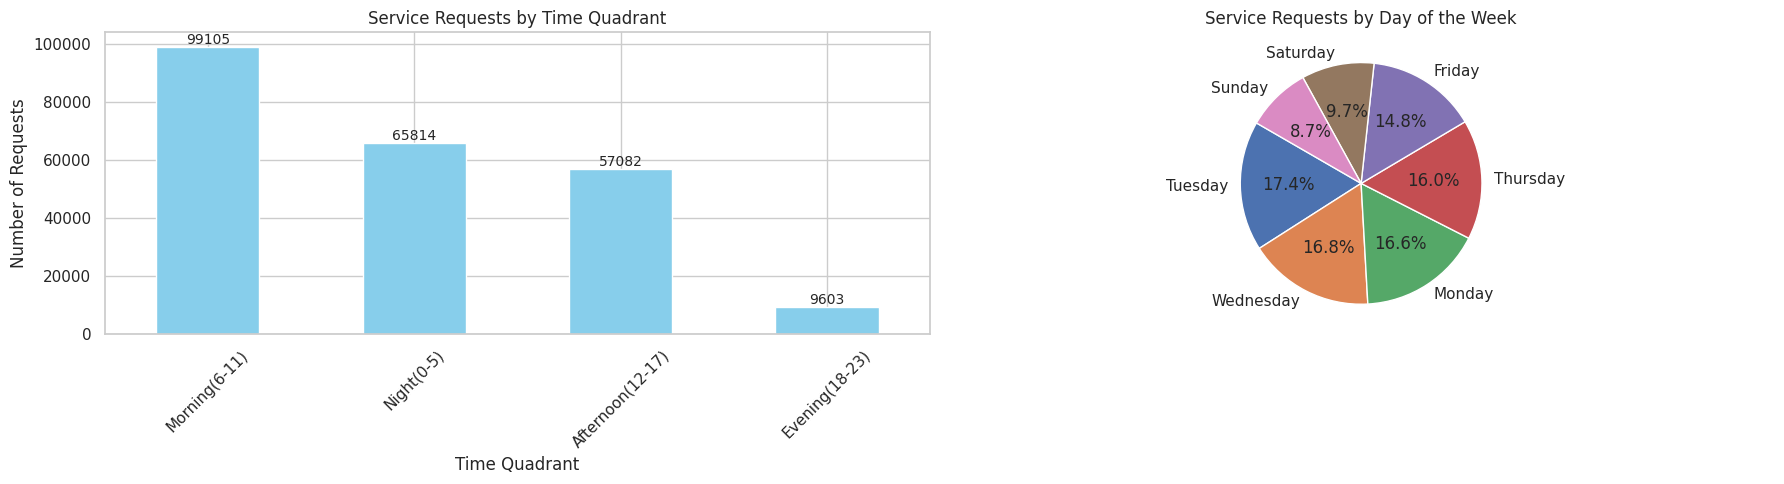

<ipython-input-42-359c131009c3>:67: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  weekly_weekend_counts = requests_tidy.groupby([requests_tidy['open_dt'].dt.week, 'weekend']).size().unstack()


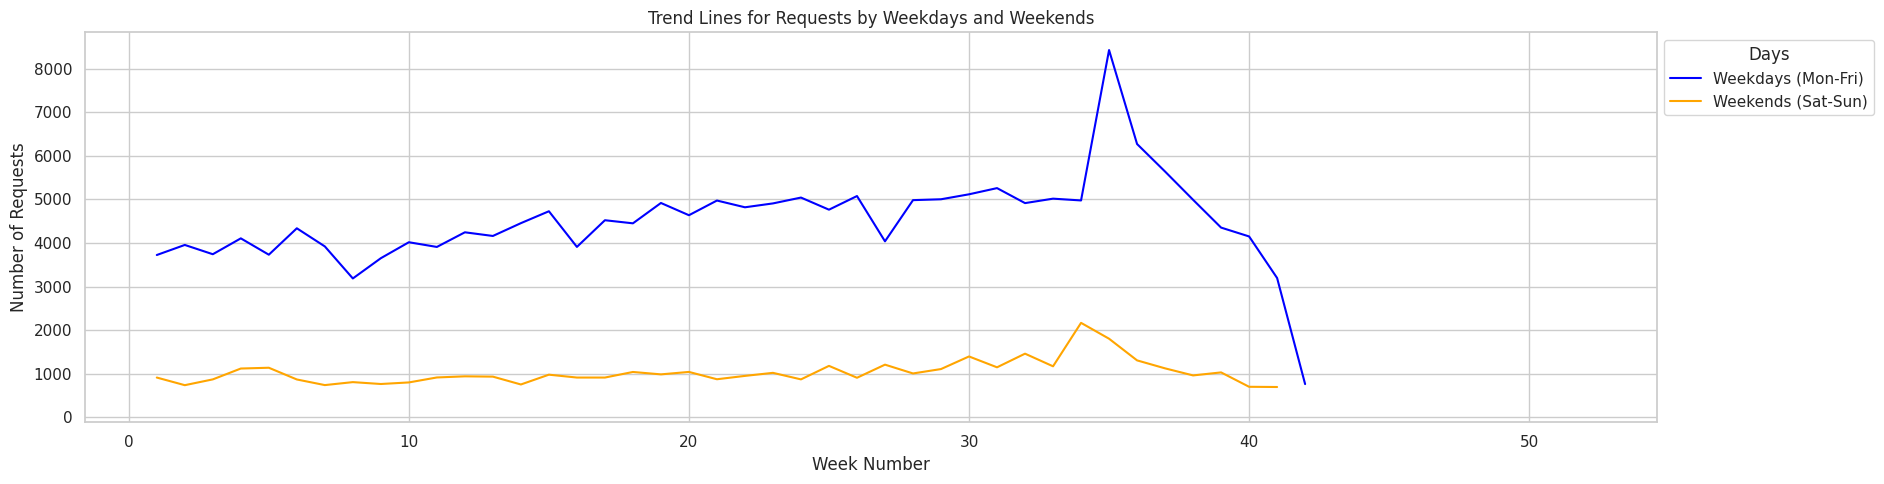

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

############## Plot 1: Service Requests by Time Quadrant

# Creating time intervals for categorization
time_intervals = {
    "Morning(6-11)": (6, 11),
    "Afternoon(12-17)": (12, 17),
    "Evening(18-23)": (18, 23),
    "Night(0-5)": (0, 5)}

# Function to categorize requests into time intervals
def categorize_time_quadrant(hour):
    for interval, (start, end) in time_intervals.items():
        if start <= hour <= end:
            return interval
    return "Unknown"

# Extracting the hour from the 'open_dt' column
requests_tidy['hour_of_day'] = requests_tidy['open_dt'].dt.hour

# Applying the categorization function to create a new column 'time_quadrant'
requests_tidy['time_quadrant'] = requests_tidy['hour_of_day'].apply(categorize_time_quadrant)

# Counting the number of requests in each time quadrant
time_quadrant_counts = requests_tidy['time_quadrant'].value_counts()

# Creating a bar plot for time quadrants
time_quadrant_counts.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Service Requests by Time Quadrant')
axes[0].set_xlabel('Time Quadrant')
axes[0].set_ylabel('Number of Requests')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(time_quadrant_counts):
    axes[0].text(i, v, str(v), ha='center', va='bottom', fontsize=10)

############## Plot 2: Service Requests by Day of the Week
# Extracting the day of the week from the 'open_dt' column
requests_tidy['day_of_week'] = requests_tidy['open_dt'].dt.day_name()

# Calculating the number of requests for each day of the week
day_of_week_counts = requests_tidy['day_of_week'].value_counts()

# Display the pie chart
plt.axis('equal')
axes[1].pie(day_of_week_counts, labels=day_of_week_counts.index, autopct='%1.1f%%', startangle=150)
axes[1].set_title('Service Requests by Day of the Week')

# Display the plots
plt.tight_layout()
plt.show()


############## Plot 3: Service Requests by Day of the Week
# Extract the day of the week (0 = Monday, 6 = Sunday)
requests_tidy['day_of_week'] = requests_tidy['open_dt'].dt.dayofweek

# Create a new column 'weekend' to categorize weekends (Saturday and Sunday) and weekdays (Monday to Friday)
requests_tidy['weekend'] = requests_tidy['day_of_week'].isin([5, 6])  # 5 and 6 represent Saturday and Sunday

# Group the data by both week number and the 'weekend' column, and calculate request counts
weekly_weekend_counts = requests_tidy.groupby([requests_tidy['open_dt'].dt.week, 'weekend']).size().unstack()

# Plot trend lines for weekdays and weekends
plt.figure(figsize=(19, 5))

# Weekdays (Monday to Friday aggregated)
plt.plot(weekly_weekend_counts.index, weekly_weekend_counts[False], label='Weekdays (Mon-Fri)', color='blue')

# Weekends (Saturday and Sunday aggregated)
plt.plot(weekly_weekend_counts.index, weekly_weekend_counts[True], label='Weekends (Sat-Sun)', color='orange')

plt.title('Trend Lines for Requests by Weekdays and Weekends')
plt.xlabel('Week Number')
plt.ylabel('Number of Requests')
plt.legend(title='Days', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()

### **Insights:**

* ### As per the data, approximately 43% of the incoming requests are in the morning slot. So we can concentrate on focusing more on the morning slots and allocating more manpower and other resources to have succesful request outcomes.

* ### Apart from this its clearly visible that weekdays on an avergae cotribute to a higher percentage of requests compared to the weekends.


## **Question 6: Analysis of overdue requests that fail to meet SLA target date. Why requests are unresolved/late?**
---

###We find out more deeply, what cases are experiencing overdue and what subject they fall into, and how they are distributed in the Boston neighborhood.

In [ ]:
#1 Check the number of cases that is overdue - done

print("\n \033[1m 1. The number of cases that are on time and overdue from the 311 report is:\033[0m \n", requests_tidy[requests_tidy["closure_category"]=="Resolved"].groupby("on_time").size())

print("\n \033[1m 2. The percentage of cases that are overdue is: \033[0m ", (len(requests_tidy.loc[(requests_tidy['on_time'] == 'OVERDUE') & (requests_tidy["closure_category"]=="Resolved")])/len(requests_tidy["closure_category"]=="Resolved"))*100, "%")

#2 Check the cases reason and subject with the highest occurrence of overdue.
df_resolved = requests_tidy[requests_tidy["closure_category"]=="Resolved"]
df_overdue = requests_tidy[(requests_tidy['on_time'] == 'OVERDUE') & (requests_tidy["closure_category"]=="Resolved")]
df_overdue_reason = df_overdue.groupby(["reason", "subject"]).size().reset_index(name="count").sort_values(by="count", ascending=False).head(10)
total=sum(df_overdue_reason["count"])
df_overdue_reason["percentage"] = (df_overdue_reason["count"] / total) * 100
print("\n \033[1m 3. The percentage of cases that are overdue base on reason and subject: \033[0m: ")
print(df_overdue_reason)

#4 Check the cases title in Enforcement & Abandoned Vehicles.
print("\n \033[1m 6. The titles of cases in the Enforcement & Abandoned Vehicles category, arranged in descending order : \033[0m",\
      requests_tidy.loc[(requests_tidy['on_time'] == 'OVERDUE') & (requests_tidy["closure_category"]=="Resolved") & (requests_tidy['subject'] == "Transportation - Traffic Division") & (requests_tidy['reason'] == "Enforcement & Abandoned Vehicles")].groupby("case_title").size().sort_values(ascending=False))

#5 Check the distribution of the Parking Enforcement cases around Boston.
print("\n \033[1m 7. From the list, we can observe that Parking Enforcement cases are distributed throughout the Boston area. \033[0m",\
      requests_tidy.loc[(requests_tidy['on_time'] == 'OVERDUE') & (requests_tidy["closure_category"]=="Resolved") & (requests_tidy['subject'] == "Transportation - Traffic Division") & (requests_tidy['reason'] == "Enforcement & Abandoned Vehicles") & (requests_tidy['case_title'] == "Parking Enforcement")].groupby("neighborhood").size().sort_values(ascending=False))

#Check sample cases with the longest ticket handling. The longest ticket handling up to 7 months
print("\n \033[1m 8. List of sample case details in the Enforcement & Abandoned Vehicles category based on the longest ticket handling time, arranged in descending order : \033[0m \n ")
print(requests_tidy.loc[(requests_tidy['on_time'] == 'OVERDUE') & (requests_tidy["closure_category"]=="Resolved") & (requests_tidy['subject'] == "Transportation - Traffic Division") & (requests_tidy['reason'] == "Enforcement & Abandoned Vehicles") & (requests_tidy['case_title'] == "Parking Enforcement"), ["open_dt","sla_target_dt","closed_dt","hours_to_closure"]].sort_values(by="hours_to_closure", ascending = False).head(5))
print("\n \033[1m 9. One sample case detail in the Enforcement & Abandoned Vehicles category with a handling time of up to 7 months: \033[0m \n")
print(requests_tidy.loc[10619,:])

#6 Check the cases reason in Public Works Department. From the data, the highest number is: Highway Maintenance
print("\n \033[1m 10.The second highest percentage of cases is within the Public Works Department. The overdue cases in this department are as follows: \033[0m  \n", requests_tidy.loc[(requests_tidy['on_time'] == 'OVERDUE') & (requests_tidy["closure_category"]=="Resolved") & (requests_tidy['subject'] == "Public Works Department")].groupby("reason").size().sort_values(ascending=False).head(5))

#7 Check the sample of Recycling cases detail
print("\n \033[1m 11. A sample of Recycling maintenance case details: \033[0m ")
print(requests_tidy.loc[(requests_tidy['on_time'] == 'OVERDUE') & (requests_tidy["closure_category"]=="Resolved") & (requests_tidy['subject'] == "Public Works Department") & (requests_tidy['reason'] == "Recycling")].groupby("case_title").size().sort_values(ascending=False).head(5))

#7 Check the sample of Highway maintenance cases detail
print("\n \033[1m 12. A sample of Highway maintenance case details: \033[0m ")
print(requests_tidy.loc[(requests_tidy['on_time'] == 'OVERDUE') & (requests_tidy["closure_category"]=="Resolved") & (requests_tidy['subject'] == "Public Works Department") & (requests_tidy['reason'] == "Highway Maintenance")].groupby("case_title").size().sort_values(ascending=False).head(5))


  1. The number of cases that are on time and overdue from the 311 report is: 
 on_time
ONTIME     105409
OVERDUE     14984
dtype: int64

  2. The percentage of cases that are overdue is:   6.469663736377609 %

  3. The percentage of cases that are overdue base on reason and subject: : 
                               reason                            subject  \
139  Enforcement & Abandoned Vehicles  Transportation - Traffic Division   
348                         Recycling            Public Works Department   
208               Highway Maintenance            Public Works Department   
379                   Signs & Signals  Transportation - Traffic Division   
398                     Street Lights            Public Works Department   
306         Park Maintenance & Safety      Parks & Recreation Department   
388                   Street Cleaning            Public Works Department   
83                           Building              Inspectional Services   
187                        

###Visualization

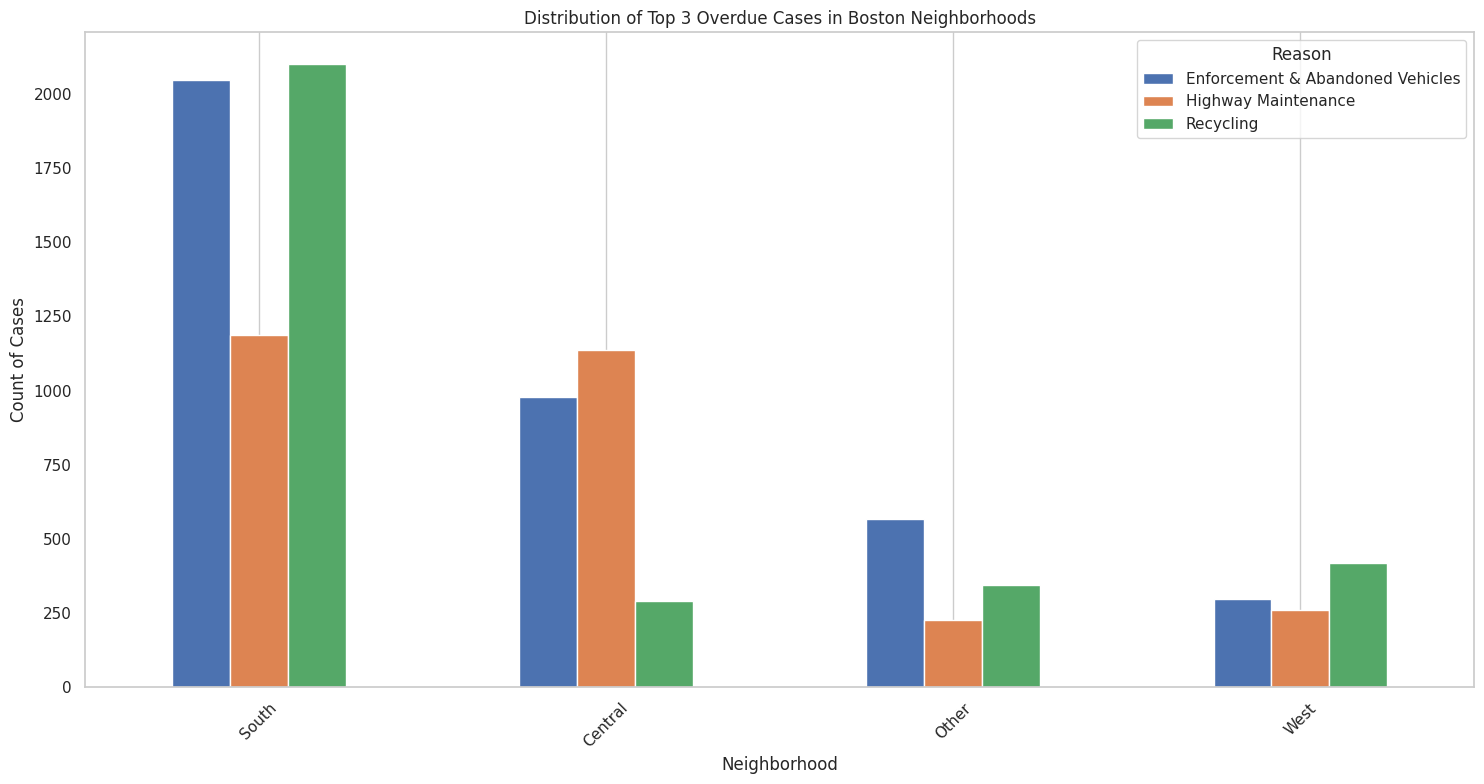

In [ ]:
#Create a bar plot to visualize the distribution of two high cases Enforcement & Abandoned Vehicles, Recycling, and Highway Maintenance in Boston Neighborhood

# Display distribution of data for "Enforcement & Abandoned Vehicles"
enforcement_data = requests_tidy[(requests_tidy["on_time"] == "OVERDUE") & (requests_tidy["reason"] == "Enforcement & Abandoned Vehicles")&(requests_tidy["closure_category"] == "Resolved") ]

# Group the filtered data by "neighborhood" and count the occurrences
neighborhood_enforcement_counts = enforcement_data.groupby("region").size().reset_index(name="count")

# Display distribution of data for "Recycle"
recycle_data = requests_tidy[(requests_tidy["on_time"] == "OVERDUE") & (requests_tidy["reason"] == "Recycling") &  (requests_tidy["closure_category"] == "Resolved")]

# Group the filtered data by "neighborhood" and count the occurrences
neighborhood_recycle_counts = recycle_data.groupby("region").size().reset_index(name="count")

# Display distribution of data for "Highway Maintenance"
highway_data = requests_tidy[(requests_tidy["on_time"] == "OVERDUE") & (requests_tidy["reason"] == "Highway Maintenance") &  (requests_tidy["closure_category"] == "Resolved")]

# Group the filtered data by "neighborhood" and count the occurrences
neighborhood_highway_counts = highway_data.groupby("region").size().reset_index(name="count")

# Add a "reason" column to distinguish between "Enforcement & Abandoned Vehicles" and "Highway Maintenance"
neighborhood_enforcement_counts["reason"] = "Enforcement & Abandoned Vehicles"

neighborhood_recycle_counts["reason"] = "Recycling"

neighborhood_highway_counts["reason"] = "Highway Maintenance"

# Combine the data for all three reasons
combined_data = pd.concat([neighborhood_enforcement_counts, neighborhood_highway_counts,neighborhood_recycle_counts ])
combined_data = combined_data[combined_data['region'] != 0]

# Pivot the data to have neighborhoods as indices, reasons as columns, and counts as values
pivot_data = combined_data.pivot(index='region', columns='reason', values='count').fillna(0)
pivot_data = pivot_data[pivot_data.index != '0']
pivot_data = pivot_data.loc[pivot_data.sum(axis=1).sort_values(ascending=False).index]

# Plot
plt.figure(figsize=(15, 8))
pivot_data.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Distribution of Top 3 Overdue Cases in Boston Neighborhoods')
plt.ylabel('Count of Cases')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Reason')
plt.grid(axis='y')
plt.show()



---


## **Conclusion:** ##
###  In summary, there are three primary factors contributing to the delay in processing 311 Boston tickets:

###  1. The first factor is the lack of priority or urgency in addressing these issues. From the data, the Transportation - Traffic Division has the highest percentage of overdue cases, particularly in the "Parking Enforcement" category (26.32%), which is distributed throughout Boston neighborhoods. Some of these cases have exceeded the Service Level Agreement (SLA) by up to 7 months before closure. The city of Boston prioritizes the handling of cases with greater urgency, such as those related to Sanitation and Street Cleaning, ensuring their timely resolution. ###
###  2. The second factor are the Local government may have limited resources, such as personnel and equipment, which can affect their ability to respond to requests in a timely manner, the administrative processes, and the budget constraints.From the data, The Public Works Department experiences the second-highest number of overdue cases, which predominantly consists of "Recycling", particularly in the "Recycling Cart Return" category (21.40%).Residents or businesses may request a recycling cart return if their existing recycling cart has gone missing or has been lost.
###  3. The third factor leading to delays is the complexity of the cases. The Public Works Department experiences the second-highest number of overdue cases, primarily related to "Highway Maintenance" (19%), which consists of "Requests for Pothole Repair." Pothole repair tasks involve complex problem-solving and need a longer duration for resolution, consequently resulting in overdue cases. ###
###**As the result**, we recommend the Government to Reassess SLAs, budget adjustments, community Involvement, and continuous improvement and create a feedback loop for continuous improvement.
---


## **Question 7: What is the resolution rate - requests w/ photo vs no photo?**
---

### The resolution rate of the service requests:

In [ ]:
# 1. Calculate the resolved rate of services
# Different categories of closure
close_cat = requests_tidy['closure_category'].unique()
closeCat_count = requests_tidy['closure_category'].value_counts()
# Calculate the total count of all requests
total = requests_tidy.shape[0]
# Calculate the rate for each closure category
categ_rates = (closeCat_count/total)*100

print('\n \033[1m 1. The rates of each closure category is:\033[0m \n')
for category, rate in categ_rates.items():
    print(f'{category}: {rate:.2f}%')
print('\nThe resolved rate of all the request service is {:.2f}%. '.format(categ_rates['Resolved']))
print('\n\033[1mThe number of each closure category is: \033[0m \n{}'.format(closeCat_count))


# 2. Print the resolution rate - requests w/ photo vs no photo
# Calculate resolution rates for requests w/ photos
# The number of service requests with a photo (photo_req).
# The number of service requests without a photo (nphoto_req).
# The number of resolved requests with a photo (photo_res).
# The number of resolved requests without a photo (nphoto_res).
# Categorical labels for resolved requests based on the photo status (cat).
# The percentage of resolved requests with a photo among all requests with a photo (photo_rate).
# The percentage of resolved requests without a photo among all requests without a photo (nphoto_rate).

photo_req = requests_clean['submitted_photo'].notnull().sum()
nphoto_req = len(requests_tidy)-photo_req

photo_res = requests_tidy[requests_tidy['closure_category']=='Resolved']['submitted_photo'].notnull().sum()
nphoto_res =  requests_tidy[requests_tidy['closure_category']=='Resolved']['submitted_photo'].isnull().sum()
cat = ['Resolved w/ photo','Resolved without photo']
photo_rate = (photo_res/photo_req)*100
nphoto_rate = (nphoto_res/nphoto_req)*100
rates = [photo_rate, nphoto_rate]
print('\n \033[1m 2. The rate of resolved requests with submitted photo is {:.2f}%,\n     the rate of resolved requests without photo is {:.2f}%.\033[0m \n'.format(photo_rate,nphoto_rate))


# 3. The rates of with or without a photo for each closure category
# Create a column to represent if a service request has a photo or not
requests_tidy['photo_status'] = np.where(requests_tidy['submitted_photo'].isnull(), 'No Photo', 'Photo')
# Group by closure category and photo status, then count the number of requests in each group
grouped_counts = requests_tidy.groupby(['closure_category', 'photo_status']).size().unstack().fillna(0)
# Calculate the total number of requests with and without photos
total_photo = requests_tidy['photo_status'].value_counts()
# Compute the rate for each group
grouped_rates = grouped_counts.divide(total_photo)

print('\n \033[1m 3. The rates of each closure category requests with \
or without photo is:\033[0m \n')
print(grouped_rates.round(2))


  1. The rates of each closure category is: 

Resolved: 51.98%
Noted: 26.54%
Others: 15.69%
Invalid: 3.03%
Duplicate: 2.76%

The resolved rate of all the request service is 51.98%. 

The number of each closure category is:  
Resolved     120393
Noted         61465
Others        36347
Invalid        7012
Duplicate      6387
Name: closure_category, dtype: int64

  2. The rate of resolved requests with submitted photo is 47.25%,
     the rate of resolved requests without photo is 51.99%. 


  3. The rates of each closure category requests with or without photo is: 

photo_status      No Photo  Photo
closure_category                 
Duplicate             0.03   0.09
Invalid               0.03   0.01
Noted                 0.27   0.40
Others                0.16   0.03
Resolved              0.52   0.47


### Visualization:

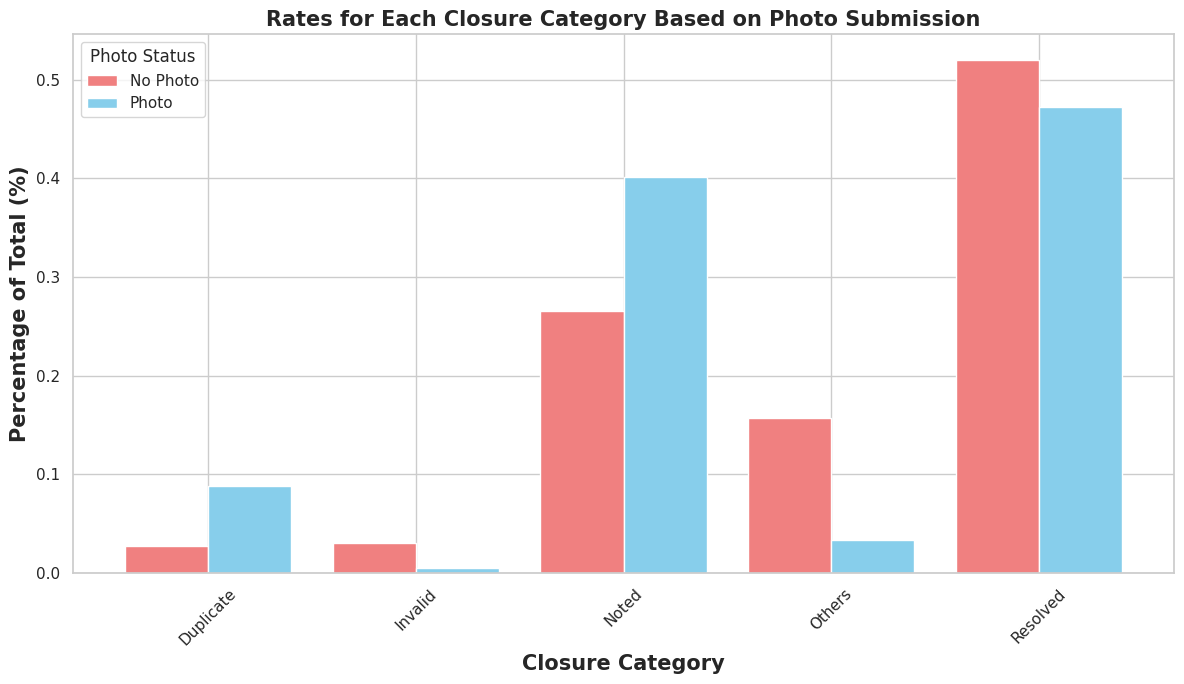

In [ ]:
# Visualization
# 3
grouped_rates.plot(kind='bar', figsize=(12, 7), color=['lightcoral', 'skyblue'], width=0.8)
plt.ylabel('Percentage of Total (%)', fontweight='bold', fontsize=15)
plt.xlabel('Closure Category', fontweight='bold', fontsize=15)
plt.title('Rates for Each Closure Category Based on Photo Submission', fontweight='bold', fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Photo Status', loc='upper left')
plt.show()

### **Conclusion**: ###

Requests submitted without photos have a slightly superior resolution rate, suggesting they might be more straightforward or the processes in place handle them more efficiently.

The presence of a photo seems to alter the way a request is categorized, with higher chances of it being labeled as a duplicate or noted. The reasons could be multifaceted, ranging from user behavior (resubmitting thinking a photo increases chances of attention) to the nature of the requests themselves (photos might depict more complex scenarios).

# **Step 5: Modeling**
---

* ### We believe that this dataset is perfect for training a machine learning model. It is information dense, high quality, and has a large variety of data points and variables.

* ### Our next objective is to develop an `early warning system` - a model that can accurately predict the probability of whether a given request will be resolved on time or not - to facility more effective prioritization by the city and its workers.

### Modeling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import metrics
request_model = requests_tidy.copy()

# Subtract to get numerical variable:datatime_to_sla with the unit:hours
request_model['time_to_sla'] = (request_model['sla_target_dt'] - request_model['open_dt']).dt.total_seconds()/3600

# Specify the resolved case result:on time/overdue
request_model['resolved_ontime'] = (request_model['on_time'] == 'ONTIME') & (requests_tidy['closure_category'] == 'Resolved')
request_model['resolved_ontime'] = request_model['resolved_ontime'].astype(int)

# Select the columns
request_model = request_model[['resolved_ontime','time_to_sla','location','submitted_photo',
                               'weekend','source','subject','region','poverty_rate','Age','Diversity','time_quadrant', "reason", "type", "queue"]]

# Encoding
request_model['Location_Provided'] = request_model['location'].notnull().astype(int)
request_model['Photo_Provided'] = request_model['submitted_photo'].notnull().astype(int)
request_model = request_model.drop(["location", "submitted_photo"], axis=1)

request_model['weekend'] = request_model["weekend"].map({True:1,False:0})
encoder = OneHotEncoder(sparse=False, drop="first")
cat_cols = ['source','subject','region','poverty_rate','Age','Diversity','time_quadrant', "reason", "type", "queue"]

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(request_model[cat_cols]))
df_encoded.columns = encoder.get_feature_names_out(cat_cols)

# Replace Categotical Data with Encoded Data
request_model = request_model.drop(cat_cols ,axis=1)
request_model = pd.concat([df_encoded, request_model], axis=1)

request_model = request_model.dropna()
#request_model.to_csv("model.csv")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Creating Train-Test Split
encoded_df = request_model.copy()

x_requests = encoded_df.drop("resolved_ontime", axis=1)
y_requests = encoded_df["resolved_ontime"]

from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca_vals = pca.fit_transform(x_requests)
print(sum(pca.explained_variance_ratio_))

xtrain, xtest, ytrain, ytest = train_test_split(pca_vals, y_requests, test_size=0.2, random_state=833)

#Training Model
from xgboost import XGBClassifier
model = XGBClassifier().fit(xtrain,ytrain)

ymodel = model.predict(xtest)

0.9999998095795833


### Results

0.4055603927102411


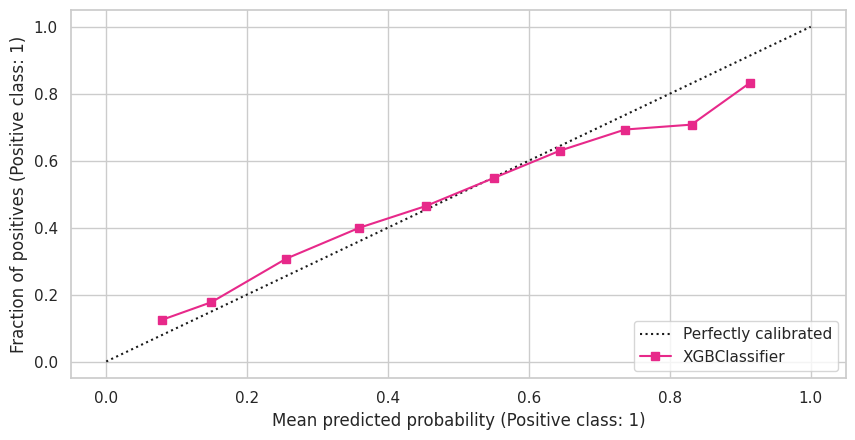

In [ ]:
# Measure Calibration of Model's probability predictions
from sklearn.calibration import CalibrationDisplay
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}

display = CalibrationDisplay.from_estimator(
        model,
        xtest,
        ytest,
        n_bins=10,
        #name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
display

def ece(y_test, preds, strategy = 'uniform'):
    df = pd.DataFrame({'target': y_test, 'proba': preds, 'bin': np.nan})

    if(strategy == 'uniform'):
        lim_inf = np.linspace(0, 0.9, 10)
        for idx, lim in enumerate(lim_inf):
            df.loc[df['proba'] >= lim, 'bin'] = idx

    elif(strategy == 'quantile'):
        pass

    df_bin_groups = pd.concat([df.groupby('bin').mean(), df['bin'].value_counts()], axis = 1)
    df_bin_groups['ece'] = (df_bin_groups['target'] - df_bin_groups['proba']).abs() * (df_bin_groups['bin'] / df.shape[0])
    return df_bin_groups['ece'].sum()

print(ece(ytest,ymodel))

### The above plot measures the accuracy of our probability predictions. The closer the red line is to the dotted line of best fit, the better our model's predictions are.

### Our model's predictions have a very low ablosute mean deviation from reality, indicating that predictions are accurate.

# **Step 6: Conclusions & Challenges**
---


## The 311 dataset is full of innumerable insights into the city of Boston. It has information that, if properly mined, can provide valuable insights into the problems of Boston and ways to optimally address them.

## **A summary of our most important findings:**
*   ###  The city receives nearly 1000 requests a day via 311, but successfully resolves only `45%` of them.
* ### A vast majority of 311 requests are made on weekdays, during the first half of the day from `12am to 11am`.
* ###  Requests made via the `311 Mobile App` have almost **twice** the resolution rate as phone requests. This is likely because app-based requests capture significantly more data on `location` (GPS) and `problem` (photos) than other methods. The city should promote the app to improve the effectiveness of 311 responses.
* ### The `Public Works` (PWDx) department, which provides core basic services such as road maintenance and waste disposal, receives over half of all 311 requests. It also the worst efficiency of all departments, with an average `hours_to_closure` twice that of the runner up, `Transportation`. The city must make  efforts to augment PWDx's capacity if it wants to improve the quality of its 311 service.   
* ### `Mattress Pickups` are the most common requests received by `Public Works`. If the city can develop standalone programs/departments specifically for these requests, that would remove a significant burden from the Public Works department and improve their efficiency on other 311 requests.
* ### The 311 service is extremely popular in areas with a high `poverty_rate`. By increasing 311 resources allocated to these neighborhoods and taking measures to prevent vandalism and violations, the city can better address the needs of these neighborhoods.

* #### Due to the high number of overdue cases, we recommend the Government reassess SLAs, to set a more realistic timeframe for request resolution.


## We believe that these findings can help improve the way 311 requests are addressed, reducing the time and resource burden on the city.



## Challenges

### The Data was messy and incomplete. We had to perform an indepth analysis of missing data, imputing when feasible and dropping when it was not possible.

### The Data was had a significant number of variables, each with several sub-categories. We conducted a preliminary analysis of the data, and chose to focus on a few key variables we discovered had a significant influence on request resolution. The modeling was difficult due to the number of attributes. We applied PCA to reduce dimensionality and computational requirements.


# **References**
---

* #### 311 SERVICE REQUESTS, https://data.boston.gov/dataset/311-service-requests
* #### BOSTON 311, https://www.boston.gov/departments/boston-311
* #### CityScore, https://www.boston.gov/innovation-and-technology/cityscore
* #### Boston Wards and Precincts, https://www.cityofboston.gov/maps/pdfs/ward_and_precincts.pdf
* #### A Profile of Poverty in Boston, https://www.bostonplans.org/getattachment/732b0b04-c218-439d-aa4d-40a3111d2956
* #### Boston Neighborhood Profiles, https://www.bostonplans.org/getattachment/7987d9b4-193b-4749-8594-e41f1ae27719


ChatGPT: Was used to condense the report of our findings into short summaries, in the "insights" section of the Visualizations